In [2]:
import pandas as pd 

file_path = 'kaggle_finances_dates.csv'
kaggle = pd.read_csv(file_path)

kaggle.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,...,recommend,ceo_approv,outlook,headline,pros,cons,Symbol,Name,Industry,regMarkPrice
0,Oracle,2012-08-22 00:00:00.000,Business Analyst,"Current Employee, more than 3 years",Bangalore,4,4,4,NaN,4,...,v,v,v,Oracle,"Good organization, good place to work.. great ...","no increments, no bonus which is really sad wi...",ORCL,Oracle Corporation Common Stock,Computer Software: Prepackaged Software,112.5
1,Oracle,2012-10-19 00:00:00.000,Senior Consultant,"Current Employee, more than 3 years",Bangalore,4,4,4,NaN,4,...,v,v,v,Good times,I enjoyed my time in Oracle. The facilities ar...,"Some departments can be bad to work for. So, i...",ORCL,Oracle Corporation Common Stock,Computer Software: Prepackaged Software,112.5
2,Oracle,2012-10-19 00:00:00.000,Senior Consultant,"Current Employee, more than 3 years",Bangalore,4,4,4,NaN,4,...,v,v,v,Good times,I enjoyed my time in Oracle. The facilities ar...,"Some departments can be bad to work for. So, i...",ORCL,Oracle Corporation Common Stock,Computer Software: Prepackaged Software,112.5
3,Oracle,2013-02-23 00:00:00.000,Consultant,"Current Employee, more than 3 years",Bangalore,4,4,4,NaN,4,...,v,v,v,Nice company to start-up with,Very nice work culture\r\nGet to learn a lot a...,Not much onsite \r\nNot much regular hikes,ORCL,Oracle Corporation Common Stock,Computer Software: Prepackaged Software,112.5
4,Oracle,2013-03-09 00:00:00.000,Senior Consultant Business Development,"Current Employee, more than 3 years",Bangalore,4,4,4,NaN,4,...,v,v,v,Good place to work good work culture,Good place to work good work culture,"Nothing as such, Management and company is ver...",ORCL,Oracle Corporation Common Stock,Computer Software: Prepackaged Software,112.5


/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:           regMarkPrice   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3.448
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.160
Time:                        11:43:47   Log-Likelihood:                -18.698
No. Observations:                   5   AIC:                             41.40
Df Residuals:                       3   BIC:                             40.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            137.0540     13.786      9.

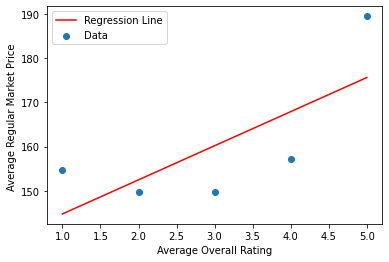

In [6]:
#Overall rating regression 

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the dataset
file_path = 'kaggle_finances_dates.csv'
kaggle = pd.read_csv(file_path)

# Group by 'regMarketPrice' and calculate the average 'overall_rating'
average_ratings = kaggle.groupby('overall_rating')['regMarkPrice'].mean().reset_index()

# Assume 'independent_variable' and 'dependent_variable' are the relevant columns
independent_variable = average_ratings['overall_rating']
dependent_variable = average_ratings['regMarkPrice']

# Add a constant term to the independent variable matrix
independent_variable_with_const = sm.add_constant(independent_variable)

# Fit the linear regression model
model = sm.OLS(dependent_variable, independent_variable_with_const).fit()

# Print the model summary
print(model.summary())

# Plot the data and regression line
plt.scatter(independent_variable, dependent_variable, label='Data')
plt.plot(independent_variable, model.predict(independent_variable_with_const), color='red', label='Regression Line')
plt.xlabel('Average Overall Rating')
plt.ylabel('Average Regular Market Price ')
plt.legend()
plt.show()



/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:           regMarkPrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     9.452
Date:                Mon, 11 Dec 2023   Prob (F-statistic):             0.0544
Time:                        11:50:53   Log-Likelihood:                -14.587
No. Observations:                   5   AIC:                             33.17
Df Residuals:                       3   BIC:                             32.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               183.1317      6.05

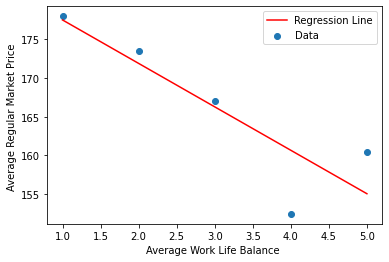

In [7]:
#work life balance  regression 

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the dataset
file_path = 'kaggle_finances_dates.csv'
kaggle = pd.read_csv(file_path)

# Group by 'regMarketPrice' and calculate the average 'overall_rating'
average_ratings = kaggle.groupby('work_life_balance')['regMarkPrice'].mean().reset_index()

# Assume 'independent_variable' and 'dependent_variable' are the relevant columns
independent_variable = average_ratings['work_life_balance']
dependent_variable = average_ratings['regMarkPrice']

# Add a constant term to the independent variable matrix
independent_variable_with_const = sm.add_constant(independent_variable)

# Fit the linear regression model
model = sm.OLS(dependent_variable, independent_variable_with_const).fit()

# Print the model summary
print(model.summary())

# Plot the data and regression line
plt.scatter(independent_variable, dependent_variable, label='Data')
plt.plot(independent_variable, model.predict(independent_variable_with_const), color='red', label='Regression Line')
plt.xlabel('Average Work Life Balance ')
plt.ylabel('Average Regular Market Price ')
plt.legend()
plt.show()




/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:           regMarkPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     5.405
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.103
Time:                        11:53:54   Log-Likelihood:                -18.508
No. Observations:                   5   AIC:                             41.02
Df Residuals:                       3   BIC:                             40.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.1727     13.274     10.033      0.0

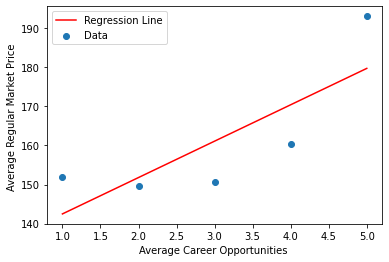

In [8]:
#career opp regression 

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the dataset
file_path = 'kaggle_finances_dates.csv'
kaggle = pd.read_csv(file_path)

# Group by 'regMarketPrice' and calculate the average 'overall_rating'
average_ratings = kaggle.groupby('career_opp')['regMarkPrice'].mean().reset_index()

# Assume 'independent_variable' and 'dependent_variable' are the relevant columns
independent_variable = average_ratings['career_opp']
dependent_variable = average_ratings['regMarkPrice']

# Add a constant term to the independent variable matrix
independent_variable_with_const = sm.add_constant(independent_variable)

# Fit the linear regression model
model = sm.OLS(dependent_variable, independent_variable_with_const).fit()

# Print the model summary
print(model.summary())

# Plot the data and regression line
plt.scatter(independent_variable, dependent_variable, label='Data')
plt.plot(independent_variable, model.predict(independent_variable_with_const), color='red', label='Regression Line')
plt.xlabel('Average Career Opportunities ')
plt.ylabel('Average Regular Market Price ')
plt.legend()
plt.show()



/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:           regMarkPrice   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     4.063
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.137
Time:                        11:55:00   Log-Likelihood:                -16.955
No. Observations:                   5   AIC:                             37.91
Df Residuals:                       3   BIC:                             37.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            141.8963      9.730     14.

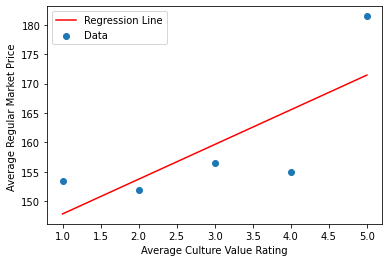

In [9]:
#Culture rating regression 

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read the dataset
file_path = 'kaggle_finances_dates.csv'
kaggle = pd.read_csv(file_path)

# Group by 'regMarketPrice' and calculate the average 'overall_rating'
average_ratings = kaggle.groupby('culture_values')['regMarkPrice'].mean().reset_index()

# Assume 'independent_variable' and 'dependent_variable' are the relevant columns
independent_variable = average_ratings['culture_values']
dependent_variable = average_ratings['regMarkPrice']

# Add a constant term to the independent variable matrix
independent_variable_with_const = sm.add_constant(independent_variable)

# Fit the linear regression model
model = sm.OLS(dependent_variable, independent_variable_with_const).fit()

# Print the model summary
print(model.summary())

# Plot the data and regression line
plt.scatter(independent_variable, dependent_variable, label='Data')
plt.plot(independent_variable, model.predict(independent_variable_with_const), color='red', label='Regression Line')
plt.xlabel('Average Culture Value Rating')
plt.ylabel('Average Regular Market Price ')
plt.legend()
plt.show()


